In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/twitter_training (1).csv')
df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [ ]:
df.drop('2401',axis=1,inplace=True)
df.drop('Borderlands',axis=1,inplace=True)

In [ ]:
df1=df.rename(columns={'Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'Reviews'})


In [ ]:
columns_titles = ["Reviews","Sentiment"]
df1=df1.reindex(columns=columns_titles)
df1.head(3)

,Reviews,Sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive


In [ ]:
df1['Sentiment'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [ ]:
df1['Reviews']

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: Reviews, Length: 74681, dtype: object

In [ ]:
# Replacing punctuations with space
df1['review_processed'] = df1['Reviews'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
#df1 = df1[['Reviews','review_processed','Sentiment']]

In [ ]:
df1['review_processed']

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: review_processed, Length: 74681, dtype: object

In [ ]:
df1['review_processed']=df1['review_processed'].astype("category") 

In [ ]:
df1['review_processed'] = df1['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))


In [ ]:
df1['review_processed']

0                 coming the borders and will kill you all
1                getting borderlands and will kill you all
2               coming borderlands and will murder you all
3              getting borderlands and will murder you all
4          getting into borderlands and can murder you all
                               ...                        
74676    Just realized that the Windows partition Mac l...
74677    Just realized that Mac window partition years ...
74678    Just realized the windows partition Mac now ye...
74679    Just realized between the windows partition Ma...
74680    Just like the windows partition Mac like years...
Name: review_processed, Length: 74681, dtype: object

In [ ]:
df1['review_processed']=df1['review_processed'].astype(str)

In [ ]:
df1['review_processed'] = [review.lower() for review in df1['review_processed']]

In [ ]:
df1['review_processed']

0                 coming the borders and will kill you all
1                getting borderlands and will kill you all
2               coming borderlands and will murder you all
3              getting borderlands and will murder you all
4          getting into borderlands and can murder you all
                               ...                        
74676    just realized that the windows partition mac l...
74677    just realized that mac window partition years ...
74678    just realized the windows partition mac now ye...
74679    just realized between the windows partition ma...
74680    just like the windows partition mac like years...
Name: review_processed, Length: 74681, dtype: object

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['game','com','twitter','like','please','verizon','got','fifa','games','facebook','still','get']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df1['review_processed'] = [remove_stopwords(r) for r in df1['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df1['review_processed'] = df1['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df1['review_processed']

0                                         come border kill
1                                      get borderland kill
2                                   come borderland murder
3                                    get borderland murder
4                                    get borderland murder
                               ...                        
74676    realize window partition mac year behind nvidi...
74677    realize mac window partition year behind nvidi...
74678    realize window partition mac year behind nvidi...
74679    realize window partition mac year behind nvidi...
74680    window partition mac year behind driver idea n...
Name: review_processed, Length: 74681, dtype: object

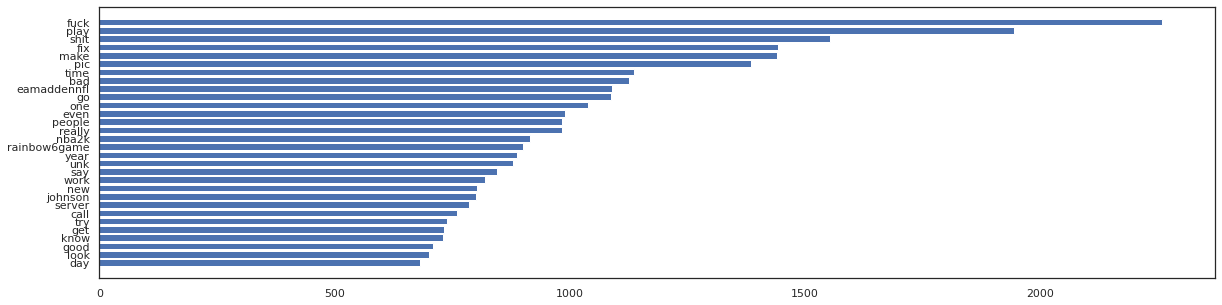

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df1.loc[df1['Sentiment'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

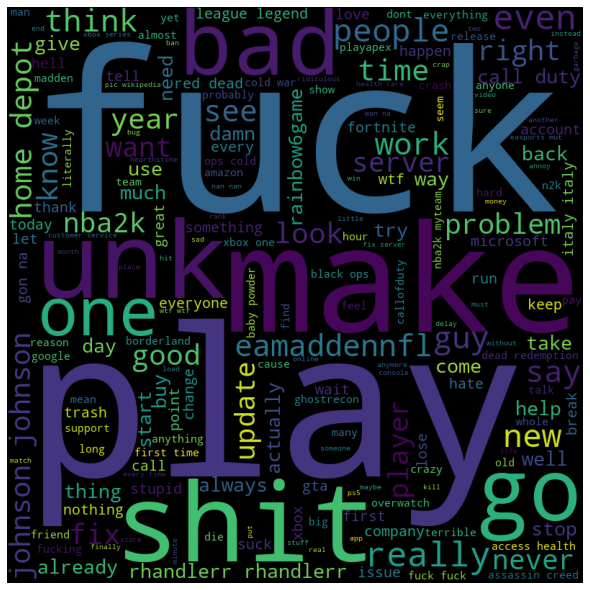

In [ ]:
from wordcloud import WordCloud
word_cloud_df = df1.loc[df1['Sentiment'] == 'Negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
#tmp_df = tfidf.fit_transform(df1.review_processed)
#feature_names = tfidf.get_feature_names()
#pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df1.review_processed).toarray()
y = df1.Sentiment.map({'Neutral' :3,'Irrelevant' :2,'Positive' : 1, 'Negative' : 0}).values
featureNames = tfidf.get_feature_names()


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
X = tfidf.fit_transform(df1.review_processed).toarray()
y = df1.Sentiment.map({'Neutral' :3,'Irrelevant' :2,'Positive' : 1, 'Negative' : 0}).values
featureNames = tfidf.get_feature_names()


X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape, X_test.shape

((59744, 2500), (14937, 2500))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred

array([2, 3, 1, ..., 0, 3, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[3621  436  191  301]
 [ 279 3305  199  279]
 [ 220  395 1760  229]
 [ 290  448  162 2822]]
The model accuracy is 0.7704358304880498


In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
labels
#sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')


array([['True Pos\n3621\n24.24%', 'False Pos\n436\n2.92%'],
       ['False Neg\n191\n1.28%', 'True Neg\n301\n2.02%']], dtype='<U20')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test),multi_class='ovo',average='macro')

0.8642951962841754

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
690,0.013036,fix
1049,0.009634,love
187,0.008780,bf4db
555,0.008738,eamaddennfl
1285,0.008357,play
...,...,...
1445,0.000009,reply
941,0.000008,jackson
1855,0.000004,unreal
1843,0.000004,unexplained
